# Q1

In [1]:
#1a Download
import torch
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1000,
                                          shuffle=False, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [2]:
# get all data set
def readdata(loader):
    X,y = [],[]
    i = 0
    for images, labels in loader:
        i+=1
        X.append(images)
        y.append(labels)
#         print(i,end ='\t')
    return torch.cat(X,axis=0),torch.cat(y,axis=0)
train_X,train_y = readdata(trainloader)
test_X,test_y = readdata(testloader)


In [3]:
train_X.shape,train_y.shape,test_X.shape,test_y.shape

(torch.Size([50000, 3, 32, 32]),
 torch.Size([50000]),
 torch.Size([10000, 3, 32, 32]),
 torch.Size([10000]))

In [4]:
# 1b Add random noise
import numpy as np
scale = 0.3
torch.manual_seed(SEED)
train_noise_X = train_X + scale * torch.randn(train_X.shape)
test_noise_X = test_X + scale * torch.randn(test_X.shape)
# normalise/standardise the pixel values to the original range
train_noise_X = np.clip(train_noise_X,train_X.min(),train_X.max())
test_noise_X = np.clip(test_noise_X,test_X.min(),test_X.max())


In [5]:
# 1c Extract a subset with only cat and dog
CatDog_train_X = train_X[(train_y==classes.index('cat')) | (train_y==classes.index('dog'))]
CatDog_test_X = test_X[(test_y==classes.index('cat')) | (test_y==classes.index('dog'))]
CatDog_train_noise_X = train_noise_X[(train_y==classes.index('cat')) | (train_y==classes.index('dog'))]
CatDog_test_noise_X = test_noise_X[(test_y==classes.index('cat')) | (test_y==classes.index('dog'))]


CatDog_train_y = train_y[(train_y==classes.index('cat')) | (train_y==classes.index('dog'))]
CatDog_train_y[CatDog_train_y==classes.index('cat')] = 0
CatDog_train_y[CatDog_train_y==classes.index('dog')] = 1

CatDog_test_y = test_y[(test_y==classes.index('cat')) | (test_y==classes.index('dog'))]
CatDog_test_y[CatDog_test_y==classes.index('cat')] = 0
CatDog_test_y[CatDog_test_y==classes.index('dog')] = 1

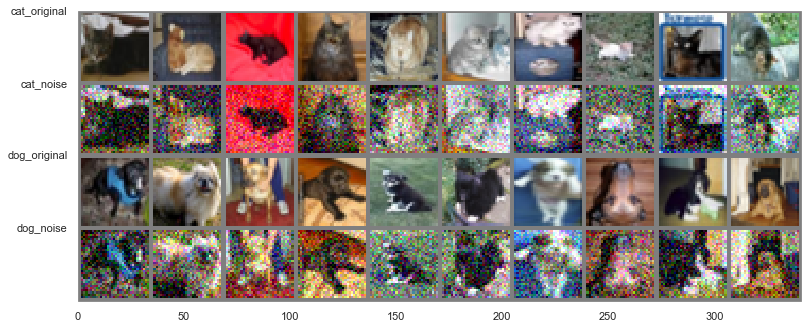

In [175]:
# 1d. Show 10 pairs of original and noisy images of cats and 10 pairs of original and noisy images of dogs.
import matplotlib.pyplot as plt
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
images_cat = CatDog_train_X[CatDog_train_y==0][:10]
images_cat_noise = CatDog_train_noise_X[CatDog_train_y==0][:10]

images_dog = CatDog_train_X[CatDog_train_y==1][:10]
images_dog_noise = CatDog_train_noise_X[CatDog_train_y==1][:10]

images = torch.cat([images_cat,images_cat_noise,images_dog,images_dog_noise],axis=0)
images = torchvision.utils.make_grid(images,nrow=10)
images = images / 2 + 0.5
images = images.numpy()
plt.figure(figsize=(13,13))
plt.imshow(np.transpose(images, (1, 2, 0)))
plt.yticks(np.arange(0,images.shape[1],34), ('cat_original', 'cat_noise', 'dog_original', 'dog_noise'))
plt.grid()
plt.show()

# Q2

In [7]:
#2a
# CatDog_train_X,CatDog_train_y
from sklearn.decomposition import PCA
# Number of components to keep
n_components = [0.99,0.95,0.75,0.70,0.50,3,2]
# select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components
# 0.99 32*32 Keep most of the information
# 0.85 0.80 Keep some information
# 0.60,0.50 Keep half of the information
# 3 2 keep 3 and 2 features
pca = []
for n_c in n_components:
    pca.append(PCA(n_components=n_c,svd_solver='full'))


In [8]:
pac_train_original = CatDog_train_X.numpy().reshape(CatDog_train_X.shape[0],-1)
pac_train_99 = pca[0].fit_transform(CatDog_train_X.numpy().reshape(CatDog_train_X.shape[0],-1))
pac_train_95 = pca[1].fit_transform(CatDog_train_X.numpy().reshape(CatDog_train_X.shape[0],-1))
pac_train_75 = pca[2].fit_transform(CatDog_train_X.numpy().reshape(CatDog_train_X.shape[0],-1))
pac_train_70 = pca[3].fit_transform(CatDog_train_X.numpy().reshape(CatDog_train_X.shape[0],-1))
pac_train_50 = pca[4].fit_transform(CatDog_train_X.numpy().reshape(CatDog_train_X.shape[0],-1))
pac_train_3 = pca[5].fit_transform(CatDog_train_X.numpy().reshape(CatDog_train_X.shape[0],-1))
pac_train_2 = pca[6].fit_transform(CatDog_train_X.numpy().reshape(CatDog_train_X.shape[0],-1))

pac_train_y = CatDog_train_y.numpy().reshape(CatDog_train_y.shape[0])

In [9]:
pac_test_original = CatDog_test_X.numpy().reshape(CatDog_test_X.shape[0],-1)
pac_test_99 = pca[0].transform(CatDog_test_X.numpy().reshape(CatDog_test_X.shape[0],-1))
pac_test_95 = pca[1].transform(CatDog_test_X.numpy().reshape(CatDog_test_X.shape[0],-1))
pac_test_75 = pca[2].transform(CatDog_test_X.numpy().reshape(CatDog_test_X.shape[0],-1))
pac_test_70 = pca[3].transform(CatDog_test_X.numpy().reshape(CatDog_test_X.shape[0],-1))
pac_test_50 = pca[4].transform(CatDog_test_X.numpy().reshape(CatDog_test_X.shape[0],-1))
pac_test_3 = pca[5].transform(CatDog_test_X.numpy().reshape(CatDog_test_X.shape[0],-1))
pac_test_2 = pca[6].transform(CatDog_test_X.numpy().reshape(CatDog_test_X.shape[0],-1))

pac_test_y = CatDog_test_y.numpy().reshape(CatDog_test_y.shape[0])

In [10]:
# 2b
# Gaussian
# Features are continuous
from sklearn.naive_bayes import GaussianNB
train_original_clf = GaussianNB()
train_original_clf.fit(pac_train_original,pac_train_y)
train_99_clf = GaussianNB()
train_99_clf.fit(pac_train_99,pac_train_y)
train_95_clf = GaussianNB()
train_95_clf.fit(pac_train_95,pac_train_y)
train_75_clf = GaussianNB()
train_75_clf.fit(pac_train_75,pac_train_y)
train_70_clf = GaussianNB()
train_70_clf.fit(pac_train_70,pac_train_y)
train_50_clf = GaussianNB()
train_50_clf.fit(pac_train_50,pac_train_y)
train_3_clf = GaussianNB()
train_3_clf.fit(pac_train_3,pac_train_y)
train_2_clf = GaussianNB()
train_2_clf.fit(pac_train_2,pac_train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
# 2c
# Evalaute the eight Naive Bayes classifiers on the test set in terms of classification accuracy and
# visualise their performance using a bar graph.
from sklearn.metrics import accuracy_score
accuracy = [
    accuracy_score(train_original_clf.predict(pac_test_original),pac_test_y),
    accuracy_score(train_99_clf.predict(pac_test_99),pac_test_y),
    accuracy_score(train_95_clf.predict(pac_test_95),pac_test_y),
    accuracy_score(train_75_clf.predict(pac_test_75),pac_test_y),
    accuracy_score(train_70_clf.predict(pac_test_70),pac_test_y),
    accuracy_score(train_50_clf.predict(pac_test_50),pac_test_y),
    accuracy_score(train_3_clf.predict(pac_test_3),pac_test_y),
    accuracy_score(train_2_clf.predict(pac_test_2),pac_test_y),
]

(0.5, 0.65)

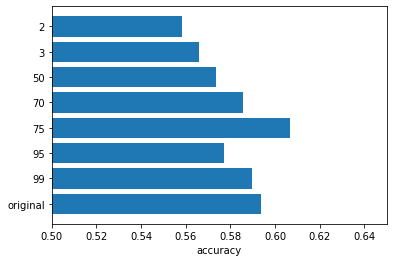

In [12]:
import matplotlib.pyplot as plt
datanames = ['original','99','95','75','70','50','3','2']
plt.barh(np.arange(len(datanames)), accuracy)
plt.yticks(np.arange(len(datanames)), datanames)
plt.xlabel('accuracy')
plt.xlim(0.5,0.65)

In [13]:
# 2d
# ROC
from sklearn.metrics import roc_curve
x_original, y_original, _ = roc_curve(pac_test_y, train_original_clf.predict_proba(pac_test_original)[:, 1])
x_99, y_99, _ = roc_curve(pac_test_y, train_99_clf.predict_proba(pac_test_99)[:, 1])
x_95, y_95, _ = roc_curve(pac_test_y, train_95_clf.predict_proba(pac_test_95)[:, 1])
x_75, y_75, _ = roc_curve(pac_test_y, train_75_clf.predict_proba(pac_test_75)[:, 1])
x_70, y_70, _ = roc_curve(pac_test_y, train_70_clf.predict_proba(pac_test_70)[:, 1])
x_50, y_50, _ = roc_curve(pac_test_y, train_50_clf.predict_proba(pac_test_50)[:, 1])
x_3, y_3, _ = roc_curve(pac_test_y, train_3_clf.predict_proba(pac_test_3)[:, 1])
x_2, y_2, _ = roc_curve(pac_test_y, train_2_clf.predict_proba(pac_test_2)[:, 1])

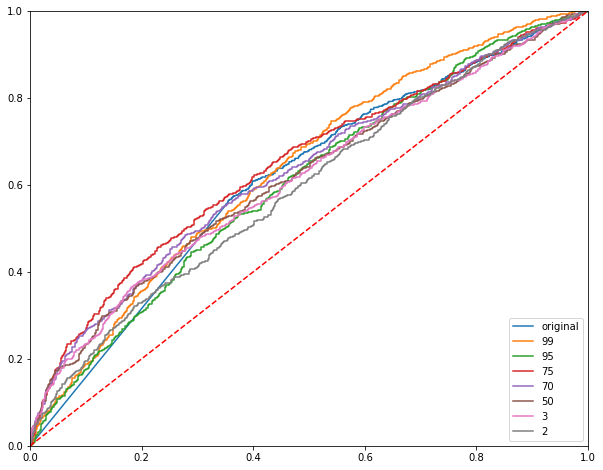

In [14]:
plt.figure(figsize=(10,8))
plt.plot(x_original, y_original,label='original')
plt.plot(x_99, y_99,label='99')
plt.plot(x_95, y_95,label='95')
plt.plot(x_75, y_75,label='75')
plt.plot(x_70, y_70,label='70')
plt.plot(x_50, y_50,label='50')
plt.plot(x_3, y_3,label='3')
plt.plot(x_2, y_2,label='2')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc="lower right")

(0.5, 0.65)

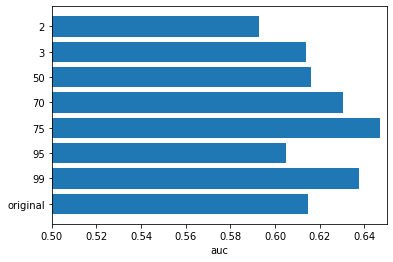

In [15]:
# 2e 
# auc
from sklearn.metrics import auc
aucs =[
    auc(x_original, y_original),
    auc(x_99, y_99),
    auc(x_95, y_95),
    auc(x_75, y_75),
    auc(x_70, y_70),
    auc(x_50, y_50),
    auc(x_3, y_3),
    auc(x_2, y_2)
]
datanames = ['original','99','95','75','70','50','3','2']
plt.barh(np.arange(len(datanames)), aucs)
plt.yticks(np.arange(len(datanames)), datanames)
plt.xlabel('auc')
plt.xlim(0.5,0.65)

In [ ]:
# 2f
# 1,According to the accuracy rate, the best classifier is the Gaussian classifier that retains 70% of 
# the picture information,rather than the original data. It may be that the original data contains some 
# noise that affects the effect of the classifier, and the noise is removed by the dimension.

# 2,When only two dimensions are reserved for data through PCA, these two dimensions still retain 
# information about many pictures, indicating that PCA retains the main information in the picture.

# 3,Observing the auc bar graph and the accuracy rate bar graph, we can see that there is a positive 
# correlation between the value of auc and the accuracy value, and the auc value is more accurate as 
# the evaluation classifier.

# Q3

In [16]:
#3a
#3a-2a
# CatDog_train_X,CatDog_train_y
from sklearn.decomposition import PCA
# Number of components to keep
n_components = [0.99,0.95,0.75,0.70,0.50,3,2]
# select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components
# 0.99 0.95 32*32 Keep most of the information
# 0.75 0.70 Keep some information
# 0.50 Keep half of the information
# 3 2 keep 3 and 2 features
pca = []
for n_c in n_components:
    pca.append(PCA(n_components=n_c,svd_solver='full'))


In [17]:
pac_train_noise_original = CatDog_train_noise_X.numpy().reshape(CatDog_train_noise_X.shape[0],-1)
pac_train_noise_99 = pca[0].fit_transform(CatDog_train_noise_X.numpy().reshape(CatDog_train_noise_X.shape[0],-1))
pac_train_noise_95 = pca[1].fit_transform(CatDog_train_noise_X.numpy().reshape(CatDog_train_noise_X.shape[0],-1))
pac_train_noise_75 = pca[2].fit_transform(CatDog_train_noise_X.numpy().reshape(CatDog_train_noise_X.shape[0],-1))
pac_train_noise_70 = pca[3].fit_transform(CatDog_train_noise_X.numpy().reshape(CatDog_train_noise_X.shape[0],-1))
pac_train_noise_50 = pca[4].fit_transform(CatDog_train_noise_X.numpy().reshape(CatDog_train_noise_X.shape[0],-1))
pac_train_noise_3 = pca[5].fit_transform(CatDog_train_noise_X.numpy().reshape(CatDog_train_noise_X.shape[0],-1))
pac_train_noise_2 = pca[6].fit_transform(CatDog_train_noise_X.numpy().reshape(CatDog_train_noise_X.shape[0],-1))

pac_train_noise_y = CatDog_train_y.numpy().reshape(CatDog_train_y.shape[0])

In [18]:
pac_test_noise_original = CatDog_test_noise_X.numpy().reshape(CatDog_test_noise_X.shape[0],-1)
pac_test_noise_99 = pca[0].transform(CatDog_test_noise_X.numpy().reshape(CatDog_test_noise_X.shape[0],-1))
pac_test_noise_95 = pca[1].transform(CatDog_test_noise_X.numpy().reshape(CatDog_test_noise_X.shape[0],-1))
pac_test_noise_75 = pca[2].transform(CatDog_test_noise_X.numpy().reshape(CatDog_test_noise_X.shape[0],-1))
pac_test_noise_70 = pca[3].transform(CatDog_test_noise_X.numpy().reshape(CatDog_test_noise_X.shape[0],-1))
pac_test_noise_50 = pca[4].transform(CatDog_test_noise_X.numpy().reshape(CatDog_test_noise_X.shape[0],-1))
pac_test_noise_3 = pca[5].transform(CatDog_test_noise_X.numpy().reshape(CatDog_test_noise_X.shape[0],-1))
pac_test_noise_2 = pca[6].transform(CatDog_test_noise_X.numpy().reshape(CatDog_test_noise_X.shape[0],-1))

pac_test_noise_y = CatDog_test_y.numpy().reshape(CatDog_test_y.shape[0])

In [19]:
# 3a-2b
# Gaussian
# Features are continuous
from sklearn.naive_bayes import GaussianNB
train_noise_original_clf = GaussianNB()
train_noise_original_clf.fit(pac_train_noise_original,pac_train_noise_y)
train_noise_99_clf = GaussianNB()
train_noise_99_clf.fit(pac_train_noise_99,pac_train_noise_y)
train_noise_95_clf = GaussianNB()
train_noise_95_clf.fit(pac_train_noise_95,pac_train_noise_y)
train_noise_75_clf = GaussianNB()
train_noise_75_clf.fit(pac_train_noise_75,pac_train_noise_y)
train_noise_70_clf = GaussianNB()
train_noise_70_clf.fit(pac_train_noise_70,pac_train_noise_y)
train_noise_50_clf = GaussianNB()
train_noise_50_clf.fit(pac_train_noise_50,pac_train_noise_y)
train_noise_3_clf = GaussianNB()
train_noise_3_clf.fit(pac_train_noise_3,pac_train_noise_y)
train_noise_2_clf = GaussianNB()
train_noise_2_clf.fit(pac_train_noise_2,pac_train_noise_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
# 2c
# Evalaute the eight Naive Bayes classifiers on the test set in terms of classification accuracy and
# visualise their performance using a bar graph.
from sklearn.metrics import accuracy_score
accuracy_noise = [
    accuracy_score(train_noise_original_clf.predict(pac_test_noise_original),pac_test_noise_y),
    accuracy_score(train_noise_99_clf.predict(pac_test_noise_99),pac_test_noise_y),
    accuracy_score(train_noise_95_clf.predict(pac_test_noise_95),pac_test_noise_y),
    accuracy_score(train_noise_75_clf.predict(pac_test_noise_75),pac_test_noise_y),
    accuracy_score(train_noise_70_clf.predict(pac_test_noise_70),pac_test_noise_y),
    accuracy_score(train_noise_50_clf.predict(pac_test_noise_50),pac_test_noise_y),
    accuracy_score(train_noise_3_clf.predict(pac_test_noise_3),pac_test_noise_y),
    accuracy_score(train_noise_2_clf.predict(pac_test_noise_2),pac_test_noise_y),
]

(0.5, 0.65)

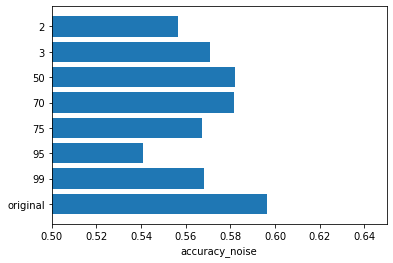

In [21]:
import matplotlib.pyplot as plt
datanames = ['original','99','95','75','70','50','3','2']
plt.barh(np.arange(len(datanames)), accuracy_noise)
plt.yticks(np.arange(len(datanames)), datanames)
plt.xlabel('accuracy_noise')
plt.xlim(0.5,0.65)

In [22]:
# 3b
from sklearn.decomposition import PCA
# Number of components to keep
n_components = [0.99,0.70,3]
# select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components
# 0.99 32*32 Keep most of the information
# 0.70 Keep some information
# 3 keep 3 features
pca = []
for n_c in n_components:
    pca.append(PCA(n_components=n_c,svd_solver='full'))

In [23]:
train_all_origin = train_X.numpy().reshape(train_X.shape[0],-1)
pac_train_all_99 = pca[0].fit_transform(train_all_origin)
pac_train_all_70 = pca[1].fit_transform(train_all_origin)
pac_train_all_3 = pca[2].fit_transform(train_all_origin)

test_all_origin = test_X.numpy().reshape(test_X.shape[0],-1)
pac_test_all_99 = pca[0].transform(test_all_origin)
pac_test_all_70 = pca[1].transform(test_all_origin)
pac_test_all_3 = pca[2].transform(test_all_origin)

In [24]:
# 3c
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import time
train_time = []

In [25]:
train_all_NB_origin_clf = GaussianNB()
start = time.clock()
train_all_NB_origin_clf.fit(train_all_origin,train_y)
train_time.append(time.clock()-start)

train_all_NB_99_clf = GaussianNB()
start = time.clock()
train_all_NB_99_clf.fit(pac_train_all_99,train_y)
train_time.append(time.clock()-start)

train_all_NB_70_clf = GaussianNB()
start = time.clock()
train_all_NB_70_clf.fit(pac_train_all_70,train_y)
train_time.append(time.clock()-start)

train_all_NB_3_clf = GaussianNB()
start = time.clock()
train_all_NB_3_clf.fit(pac_train_all_3,train_y)
train_time.append(time.clock()-start)

In [26]:
train_all_LR_origin_clf = LogisticRegression(solver='lbfgs',multi_class='multinomial')
start = time.clock()
train_all_LR_origin_clf.fit(train_all_origin,train_y)
train_time.append(time.clock()-start)

train_all_LR_99_clf = LogisticRegression(solver='lbfgs',multi_class='multinomial')
start = time.clock()
train_all_LR_99_clf.fit(pac_train_all_99,train_y)
train_time.append(time.clock()-start)

train_all_LR_70_clf = LogisticRegression(solver='lbfgs',multi_class='multinomial')
start = time.clock()
train_all_LR_70_clf.fit(pac_train_all_70,train_y)
train_time.append(time.clock()-start)

train_all_LR_3_clf = LogisticRegression(solver='lbfgs',multi_class='multinomial')
start = time.clock()
train_all_LR_3_clf.fit(pac_train_all_3,train_y)
train_time.append(time.clock()-start)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [27]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [28]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [29]:
start = time.clock()
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
train_time.append(time.clock()-start)

[1,  2000] loss: 2.220
[1,  4000] loss: 1.885
[1,  6000] loss: 1.683
[1,  8000] loss: 1.575
[1, 10000] loss: 1.489
[1, 12000] loss: 1.461
[2,  2000] loss: 1.380
[2,  4000] loss: 1.336
[2,  6000] loss: 1.322
[2,  8000] loss: 1.309
[2, 10000] loss: 1.296
[2, 12000] loss: 1.272


In [30]:
from sklearn.metrics import accuracy_score
accuracy_all = []
test_time = []

start = time.clock()
_y1 = train_all_NB_origin_clf.predict(test_all_origin)
test_time.append(time.clock()-start)
accuracy_all.append(accuracy_score(_y1,test_y))
start = time.clock()
_y2 = train_all_NB_99_clf.predict(pac_test_all_99)
test_time.append(time.clock()-start)
accuracy_all.append(accuracy_score(_y2,test_y))
start = time.clock()
_y3 = train_all_NB_70_clf.predict(pac_test_all_70)
test_time.append(time.clock()-start)
accuracy_all.append(accuracy_score(_y3,test_y))
start = time.clock()
_y4 = train_all_NB_3_clf.predict(pac_test_all_3)
test_time.append(time.clock()-start)
accuracy_all.append(accuracy_score(_y4,test_y))

start = time.clock()
_y5 = train_all_LR_origin_clf.predict(test_all_origin)
test_time.append(time.clock()-start)
accuracy_all.append(accuracy_score(_y5,test_y))
start = time.clock()
_y6 = train_all_LR_99_clf.predict(pac_test_all_99)
test_time.append(time.clock()-start)
accuracy_all.append(accuracy_score(_y6,test_y))
start = time.clock()
_y7 = train_all_LR_70_clf.predict(pac_test_all_70)
test_time.append(time.clock()-start)
accuracy_all.append(accuracy_score(_y7,test_y))
start = time.clock()
_y8 = train_all_LR_3_clf.predict(pac_test_all_3)
test_time.append(time.clock()-start)
accuracy_all.append(accuracy_score(_y8,test_y))


In [31]:
start = time.clock()
_y9 = net(test_X).detach().numpy()
_y9 = _y9.argmax(axis=1)
test_time.append(time.clock()-start)
accuracy_all.append(accuracy_score(_y9,test_y))

In [32]:
len(train_time)

9

Text(0.5, 0, 'accuracy_all')

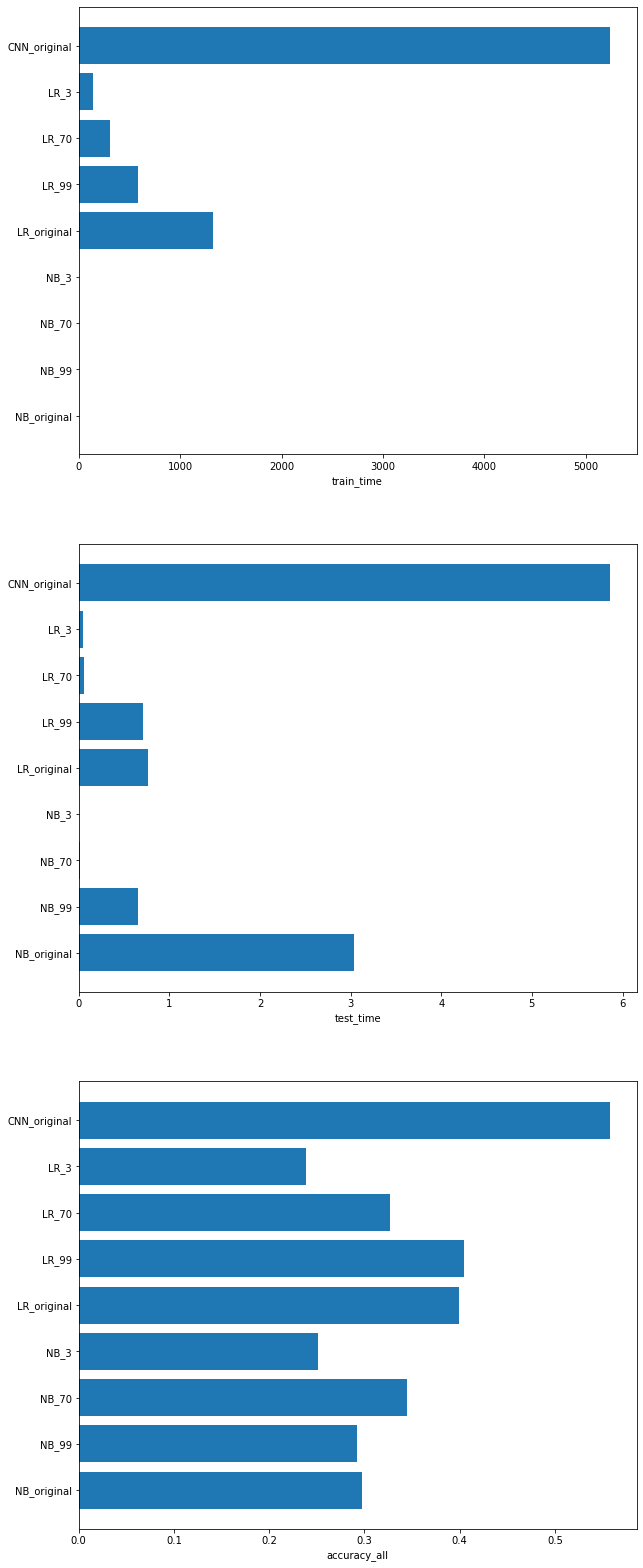

In [33]:
# 3d
import matplotlib.pyplot as plt
datanames = ['NB_original','NB_99','NB_70','NB_3','LR_original','LR_99','LR_70','LR_3','CNN_original']
plt.figure(figsize=(10,28))
plt.subplot(311)
plt.barh(np.arange(len(datanames)), np.array(train_time))
plt.yticks(np.arange(len(datanames)), datanames)
plt.xlabel('train_time')
plt.subplot(312)
plt.barh(np.arange(len(datanames)), np.array(test_time))
plt.yticks(np.arange(len(da`tanames)), datanames)
plt.xlabel('test_time')
plt.subplot(313)
plt.barh(np.arange(len(datanames)), np.array(accuracy_all))
plt.yticks(np.arange(len(datanames)), datanames)
plt.xlabel('accuracy_all')


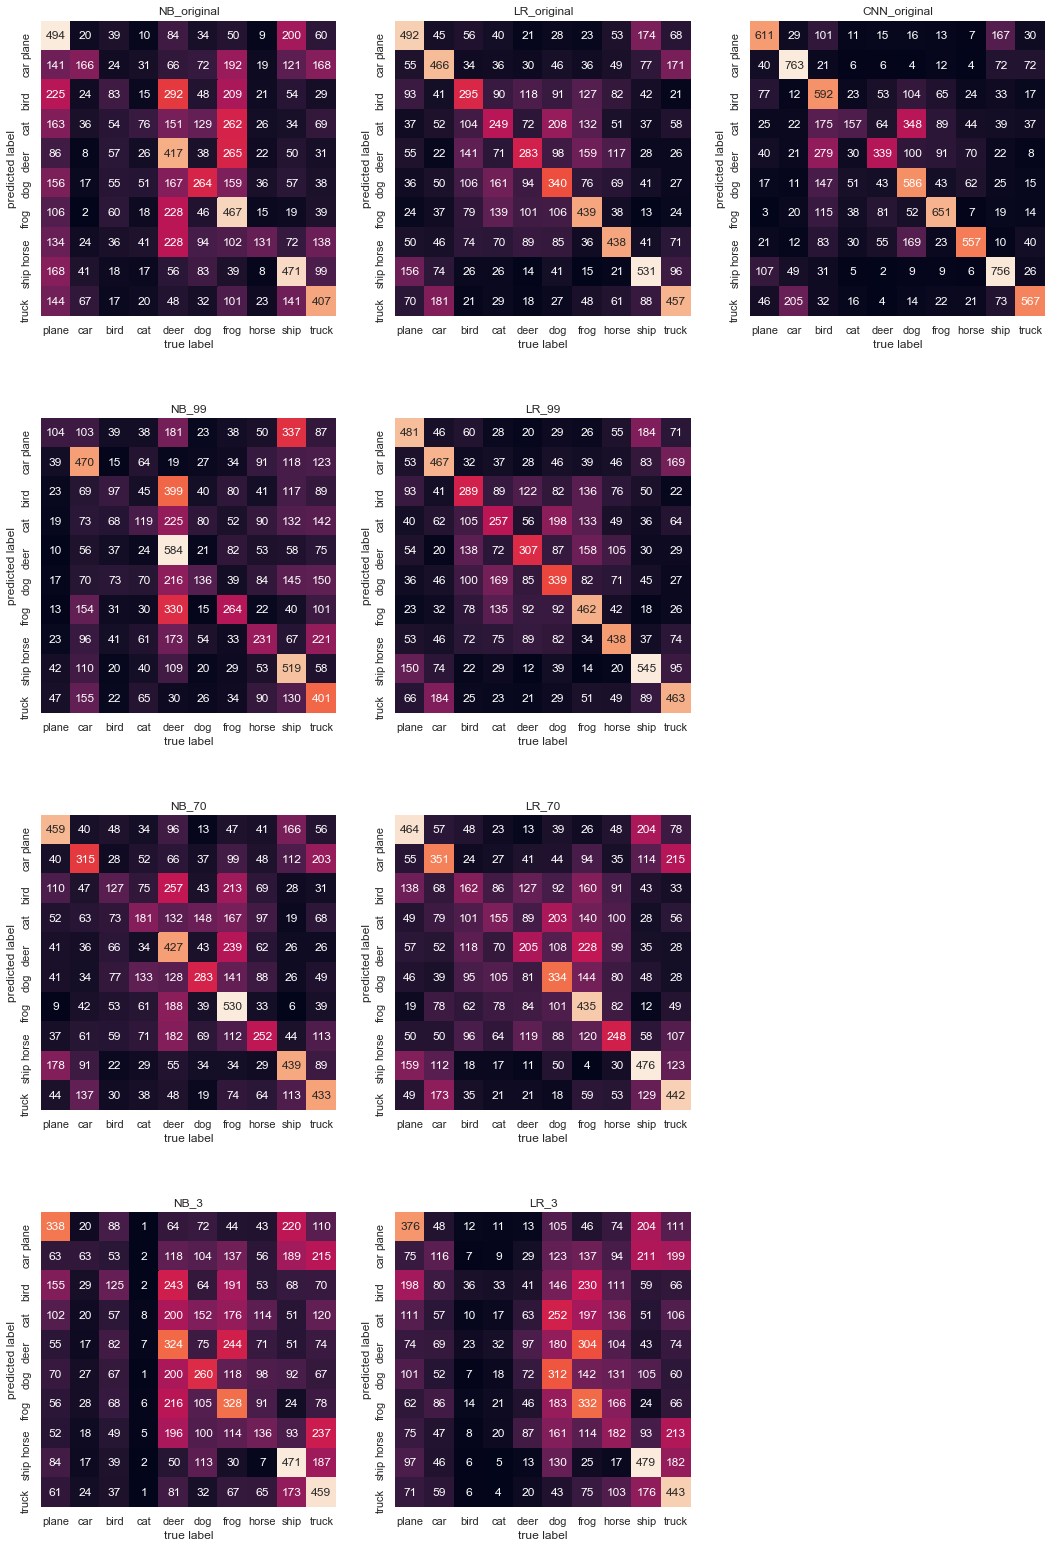

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()
plt.figure(figsize=(18,28))

_ys = [_y1,_y2,_y3,_y4,_y5,_y6,_y7,_y8,_y9]
loc = [1,4,7,10,2,5,8,11,3]
for i in range(9):
    plt.subplot(4,3,loc[i])
    mat = confusion_matrix(_ys[i], test_y)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=classes,yticklabels=classes)
    plt.title(datanames[i])
    plt.xlabel('true label')
    plt.ylabel('predicted label')

In [49]:
# ((_y1==0)&(test_y.numpy()==0)).sum()

494

In [ ]:
# 3f
# 1,The Gauss Bayes classifier has the fastest training speed, and the test time increases 
# with the increase of the data dimension.

# 2,CNN has the best classification, but it takes a lot of time to train.CNN easily recognizes 
# a cat as a dog and easily recognizes a trunk as a car.

# 3,In Figure NB_3 and LR_3,PAC loses some of the characteristics of birds and cats, so the result 
# of the classifier being recognized as a cat is very small.

# Q4

In [187]:
# 4a
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            # 1 input image channel, 16 output channel, 3x3 square convolution
            nn.Conv2d(3, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1),
#             nn.Sigmoid()  #to range [0, 1]
            nn.Tanh() #to range[-1,1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [188]:
class NoiseTrainset(object):
    """An abstract class representing a Dataset.

    All other datasets should subclass it. All subclasses should override
    ``__len__``, that provides the size of the dataset, and ``__getitem__``,
    supporting integer indexing in range from 0 to len(self) exclusive.
    """
    def __init__(self,train_noise,train_X):
        self.X = train_noise
        self.y = train_X

    def __getitem__(self, index):
        return self.X[index],self.y[index]

    def __len__(self):
        return self.X.shape[0]


In [189]:
# 4b
# Set the random seed for reproducibility 
torch.manual_seed(SEED)
#Hyperparameters for training
batch_size=64
learning_rate=1e-3
max_epochs = 20

myAE = Autoencoder()
#Choose mean square error loss
criterion = nn.MSELoss() 
#Choose the Adam optimiser
optimizer = torch.optim.Adam(myAE.parameters(), lr=learning_rate, weight_decay=1e-5)
#Specify how the data will be loaded in batches (with random shffling)
train_loader = torch.utils.data.DataLoader(NoiseTrainset(train_noise_X,train_X), batch_size=batch_size,
                                          shuffle=True, num_workers=2)
#Storage
outputs = []
#Start training
for epoch in range(max_epochs):
    for data in train_loader:
        img_noise, img = data
        optimizer.zero_grad()
        recon = myAE(img_noise)
        loss = criterion(recon, img)
        loss.backward()
        optimizer.step()
    if (epoch % 3) == 0:
        print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
    outputs.append((epoch, img, recon),)

Epoch:1, Loss:0.0291
Epoch:4, Loss:0.0183
Epoch:7, Loss:0.0196
Epoch:10, Loss:0.0146
Epoch:13, Loss:0.0181
Epoch:16, Loss:0.0200
Epoch:19, Loss:0.0195


In [200]:
# 4c
# test_noise_X,test_X
_test_X = myAE(test_noise_X)

test_original_images = test_X.split(1,dim=0)
test_out_images = _test_X.split(1,dim=0)
losses = []
for i in range(len(test_noise_images)):
    losses.append(criterion(test_out_images[i],test_noise_images[i]).detach().numpy())
losses = np.array(losses)
worst_out_index = sorted(range(losses.shape[0]),key=lambda x:losses[x],reverse=True)

worst30_original_images = []
worst30_out_images = []
for index in worst_out_index[:30]:
    worst30_original_images.append(test_original_images[index])
    worst30_out_images.append(test_out_images[index])
images = []
for i in range(3):
    images += worst30_original_images[10*i:10*(i+1)]
    images += worst30_out_images[10*i:10*(i+1)]
    
images = torch.cat(images,axis=0)
images = torchvision.utils.make_grid(images,nrow=10)
images = images / 2 + 0.5
images = images.detach().numpy()

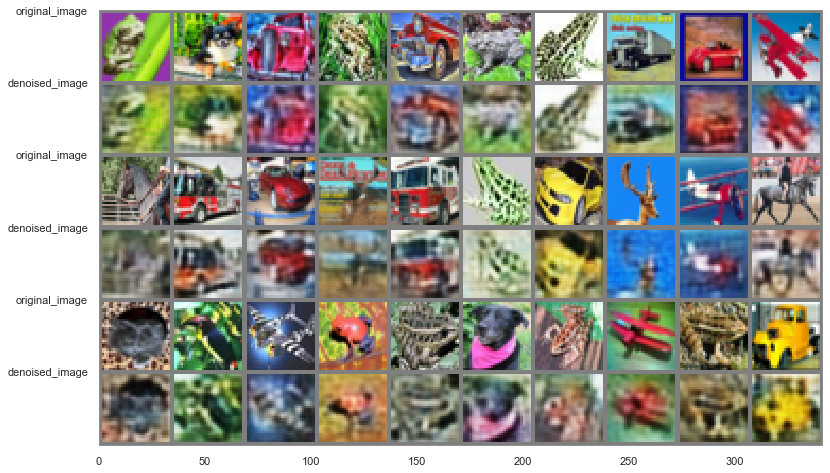

In [201]:
plt.figure(figsize=(13,13))
plt.imshow(np.transpose(images, (1, 2, 0)))
plt.yticks(np.arange(0,images.shape[1],34), ['original_image', 'denoised_image']*3)
plt.grid()
plt.show()

In [ ]:
# 4d
# batch_size 16 32 64
# lr -2,-3,-4
hyperparameters = [(16,1e-4),(16,1e-3),(16,1e-2),
                   (32,1e-4),(32,1e-3),(32,1e-2),
                   (64,1e-4),(64,1e-3),(64,1e-2)]
train_time = []
mean_losses = []
for batch_size,learning_rate in hyperparameters:
    max_epochs = 20

    myAE = Autoencoder()
    #Choose mean square error loss
    criterion = nn.MSELoss() 
    #Choose the Adam optimiser
    optimizer = torch.optim.Adam(myAE.parameters(), lr=learning_rate, weight_decay=1e-5)
    #Specify how the data will be loaded in batches (with random shffling)
    train_loader = torch.utils.data.DataLoader(NoiseTrainset(train_noise_X,train_X), batch_size=batch_size,
                                              shuffle=True, num_workers=2)
    #Storage
    mean_loss = []
    #Start training
    start = time.clock()
    for epoch in range(max_epochs):
        loss_all = []
        for data in train_loader:
            img_noise, img = data
            optimizer.zero_grad()
            recon = myAE(img_noise)
            loss = criterion(recon, img)
            loss_all.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
#         if (epoch % 3) == 0:
#             print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
        mean_loss.append(np.array(loss_all).mean())
    train_time.append(time.clock()-start)
    mean_losses.append(mean_loss)
    print(train_time[-1])
    print(mean_losses[-1])

46387.09796100001
[0.08026309, 0.038058832, 0.03102678, 0.027075816, 0.024859302, 0.023420015, 0.022448309, 0.021744955, 0.021208111, 0.020766905, 0.020395752, 0.02008377, 0.019806853, 0.019563252, 0.019326055, 0.0191266, 0.018943159, 0.01877863, 0.018629558, 0.018498944]
49054.23671500001
[0.03927476, 0.02191408, 0.019946871, 0.019205544, 0.018780394, 0.018550498, 0.018403018, 0.018321734, 0.018236574, 0.018183175, 0.018130992, 0.018085482, 0.018055033, 0.018022073, 0.01797625, 0.017950317, 0.017951448, 0.017911196, 0.017887978, 0.017892355]
58007.41182899999
[0.050525498, 0.03581119, 0.03580707, 0.03588011, 0.03474624, 0.037910122, 0.035781283, 0.0361249, 0.036169585, 0.034842186, 0.03576563, 0.035348136, 0.035614535, 0.037958104, 0.036383234, 0.035879746, 0.03627215, 0.03590054, 0.03753721, 0.03658781]
33717.920738000015
[0.09668117, 0.044951055, 0.03693297, 0.03278598, 0.030102486, 0.027895771, 0.025916087, 0.024688413, 0.02376864, 0.02302693, 0.0224214, 0.021930346, 0.021505272, 0

Text(0.5, 0, 'train_time')

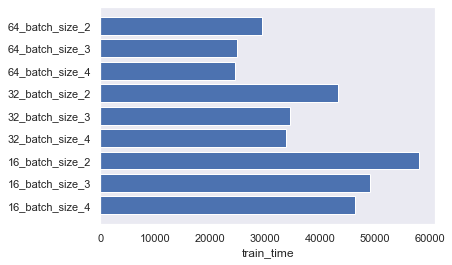

In [208]:
# 4d
import matplotlib.pyplot as plt
datanames = ['16_batch_size_4','16_batch_size_3','16_batch_size_2','32_batch_size_4','32_batch_size_3','32_batch_size_2','64_batch_size_4','64_batch_size_3','64_batch_size_2']
plt.barh(np.arange(len(datanames)), np.array(train_time))
plt.yticks(np.arange(len(datanames)), datanames)
plt.grid()
plt.xlabel('train_time')

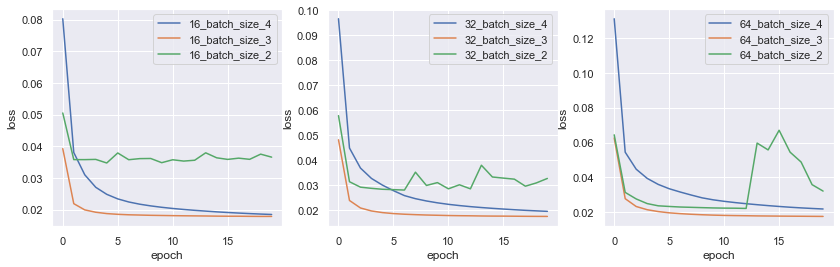

In [230]:
plt.figure(figsize=(14,4))
for i in range(3):
    plt.subplot(1,3,i+1)
    for j in range(3):
        index = i*3+j
        plt.plot(mean_losses[index],label=datanames[index])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()

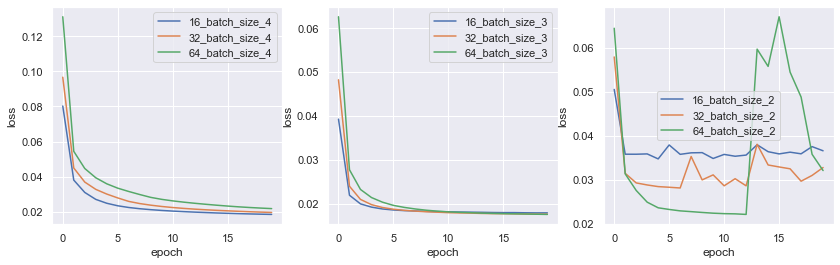

In [231]:
plt.figure(figsize=(14,4))
for i in range(3):
    plt.subplot(1,3,i+1)
    for j in range(3):
        index = i+j*3
        plt.plot(mean_losses[index],label=datanames[index])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()

In [ ]:
# 4e
# 1,If the learning rate is too high, the model will not converge and the training time will increase.
# The smaller the batch_size, the faster the convergence

# 2,